In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True, randRGBcolors = [], bounds = [], subplot_ = 1, figsize = 40, ax_ = None, label = ''):
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np
    if randRGBcolors:
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]
        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))
        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]
        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)
    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        if ax_ is None:
            fig, ax_ = plt.subplots(1, 1, figsize=(figsize, 0.5))
        bounds = np.linspace(0, nlabels, nlabels + 1) if bounds == [] else bounds
        norm = colors.BoundaryNorm(bounds, nlabels)
        cb = colorbar.ColorbarBase(ax_, cmap=random_colormap, norm=norm, spacing='proportional', ticks=[],
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')
        if label != '':
            cb.ax.tick_params(labelsize='large')
            cb.set_label(label,size=70)
    return random_colormap, randRGBcolors

In [4]:
set_all_elems = set()
import random
def process(elem, sign):
    if len( elem.split('(') ) > 1:

        elem_ret = elem.split('(')[1]
        begin, len2, id, strand = elem_ret.split(',')
        if strand.strip() == sign:
            return int(begin), int(len2), id
all_regions = []
figsize = 40
fig = plt.figure(figsize=(40, 5))

axes = [[0.05, 1, 0.9, 0.15]]
axses_real = []
biggest = 0
npip_dict = dict()
for i in open('../results/output_hg19_100.txt'):
    line = i.split('\t')
    len_ = int(line[2]) - int(line[1])
    if len_ > biggest:
        biggest = len_
for i in open('../results/output_hg19_100.txt'):
    line = i.split('\t')
    s1 = line[4][1:-2]
    len_ = int(line[2]) - int(line[1])
    elems = s1.split(')')
    elems_real = []
    set_help = set()


    for j in elems:
        rez = process(j, '+')
        if not rez or len(rez) == 0:
            continue
        if rez:
            b,l,id = rez
            elems_real.append((b,l,id))
            set_help.add(id)
    all_regions.append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))
    npip_dict[line[3]] = [(line[0], int(line[1]), int(line[2]) , line[3] , elems_real )]

    elems_real = []

    for j in elems:
        rez = process(j, '_')
        if not rez or len(rez) == 0:
            continue
        if rez:
            b,l,id = rez
            elems_real.append((b,l,id))
            set_help.add(id)
    all_regions.append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))
    npip_dict[line[3]].append((line[0], int(line[1]), int(line[2]) , line[3] , elems_real ))

    # print (elems_real)
    # print (len(elems_real), len(set(set_help)))
    set_all_elems = set_all_elems.union(set_help)
print (f'len of elems: {len(set_all_elems)}')
dict_colors = dict()
cmap, randRGBcolors = rand_cmap(len(set_all_elems), type='bright', first_color_black=False, last_color_black=False, verbose=False)
dict_colors['0'] = (0,0,0)
assert len(randRGBcolors) == len(set_all_elems) 
list_all_elems = list(set_all_elems)
for i in range(len(randRGBcolors)):
    dict_colors[list_all_elems[i]] = randRGBcolors[i]
# print (dict_colors)
count = 0
npip_list = ['NPIPA5', 'NPIPA7', 'NPIPA8', 'NPIPA1', 'NPIPA2', 'NPIPA3', 'NPIPB12', 'NPIPB15', 'NPIPB7', 'NPIPB8', 'NPIPB9', 'NPIPB6', 'NPIPB11', 'NPIPB13', 'NPIPB4', 'NPIPB5', 'NPIPB3']
# for npip in all_regions:
for npip1 in npip_list:
    len_ = npip_dict[npip1][0][2] - npip_dict[npip1][0][1]
    new_axe = axes[-1]
    new_axe[1] = new_axe[1]  - 0.7
    new_axe[2] = biggest / len_  
    ax1 = fig.add_axes(new_axe)


    # for new negative one
    new_axe = axes[-1]
    new_axe[1] = new_axe[1]  - 0.3
    new_axe[2] = biggest / len_  
    ax2 = fig.add_axes(new_axe)

    for npip in npip_dict[npip1]:
        npip_elems = npip[4]
        max_gap = 0
        count += 1
        list_locations = []
        list_locations.append(0)
        begin = npip[1]
        list_colors = [dict_colors['0']]
        for i in range(0, len(npip_elems) - 1):
            gap = npip_elems[i + 1][0] - (npip_elems[i][0] + npip_elems[i][1])
            list_locations.append(npip_elems[i][0] - begin)
            list_colors.append(dict_colors[npip_elems[i][2]])
            if gap > 0:
                list_locations.append(npip_elems[i][0] + npip_elems[i][1] - begin)
                list_colors.append(dict_colors['0'])
                if gap > max_gap:
                    max_gap = gap
        
        list_locations.append(npip_elems[-1][0]- begin)
        list_colors.append(dict_colors[npip_elems[-1][2]])

        list_locations.append(npip[2] - npip[1])
        list_colors.append(dict_colors['0'])
        
        for i in range(0, len(list_locations) - 1):
            if list_locations[i] > list_locations[i+1]:
                print (list_locations[i] , list_locations[i+1], i, i+1 , len(list_locations))
                assert False
        label=''
        ax = ax1
        if(count % 2 == 0):
            label=npip[3]
            ax = ax2

        cmap, randRGBcolors= rand_cmap(len(list_locations), type='0', first_color_black=False, last_color_black=False, verbose=True, randRGBcolors = list_colors, bounds = list_locations, subplot_ = count, figsize = figsize, ax_ = ax, label=label)

        assert (len(list_locations) == len(list_colors))





FileNotFoundError: [Errno 2] No such file or directory: '../results/output_hg19_100.txt'

<Figure size 2880x360 with 0 Axes>

0.522523
['NPIPA2', 'NPIPA3', 'NPIPA5', 'NPIPA1', 'NPIPA8', 'NPIPA7', 'NPIPB3', 'NPIPB4', 'NPIPB5', 'NPIPB6', 'NPIPB7', 'NPIPB8', 'NPIPB9', 'NPIPB11', 'NPIPB12', 'NPIPB13', 'NPIPB15']
[Clade(name='NPIPA1'), Clade(name='NPIPA8'), Clade(name='NPIPA2'), Clade(name='NPIPA7'), Clade(name='NPIPA5'), Clade(name='NPIPA3'), Clade(name='NPIPB4'), Clade(name='NPIPB9'), Clade(name='NPIPB12'), Clade(name='NPIPB11'), Clade(name='NPIPB8'), Clade(name='NPIPB15'), Clade(name='NPIPB13'), Clade(name='NPIPB3'), Clade(name='NPIPB6'), Clade(name='NPIPB7'), Clade(name='NPIPB5')]
1


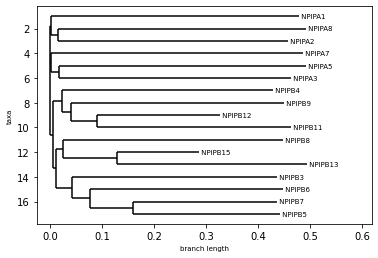

In [11]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import average, linkage
from matplotlib import pyplot as plt
import scipy
import pandas as pd 
import scipy.spatial
import scipy.cluster
import json
import matplotlib.pyplot as plt
from functools import reduce
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
import pylab
from Bio import Phylo
import sys

# Loading data
file_ = open('../phylo/_o', 'r').readlines()
matrix_len = file_[0]
b = np.ones((int(matrix_len),int(matrix_len)))
min_ = 2.0
for i in file_[1:]:
    line = i.split('\t')
    c1 = int(line[0])
    c2 = int(line[1])
    
    num = float(line[2])
    if num < min_:
        min_ = num
    b[c1][c2] = num
    b[c2][c1] = num


X = b
for i in range(0, len(X)):
    X[i][i] = 0.0
print (min_)

s = ''
names = []
for i in open('../phylo/_o_sd'):
	line = i.split('\t')
	names.append(f'{line[3]}')
print (names)
labels = names

# # this part for neighbour joining

X_sub = []
for i in range(0,len(X)):
    X_sub_one = []
    for j in range (0,i+1):
        X_sub_one.append(X[i][j])
    X_sub.append(X_sub_one)
X = X_sub

dm = DistanceMatrix(names=labels, matrix=X)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
tree.ladderize()
plt.rc('font', size=7)          # controls default text sizes #HERE IS THE SETTING FOR THAT ALLOWS ME TO HIDE THE BRANCH TIP LABELS
plt.rc('axes', titlesize=50)     # fontsize of the axes title
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)   # fontsize of the figure title
print (list(tree.find_clades(terminal=True)))
def label_func(node):
    l = []
    for i in list(tree.find_clades(terminal=True)):
        l.append(i.name)
    if str(node) in l:
        return str(node)
    return ''
Phylo.draw(tree, do_show=False, show_confidence = False, label_func = label_func)

# Phylo.draw_graphviz(tree)
plt.savefig("TreeToCutOff.png", format='png', dpi=1200)
# pylab.show()
print('1')